### Student Information
Name:施睿為 Ruei-Wei, Shih

Student ID:112061536

GitHub ID: rwshihhh

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

# 1. First -> Exercise

### ** >>> Exercise 1 (5 min): **  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [1]:
# set environment & required data
# obtain the documents containing the categories provided
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', categories=categories,    # choose the categories we wamt
                                  shuffle=True, random_state=42)            # ensure we use the ssame order

# Answer here
for t in twenty_train.data[0:3]:
    print(t)

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectangular mesh in the uv

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [2]:
# set environment & required data
import pandas as pd
import helpers.data_mining_helpers as dmh
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

#Answer here
# only see front rows, default 5.
print(X.head())
print("\n ---- separate line ----\n")
# choose rows by condition
print(X[X['category'] == 1])

                                                text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian  

 ---- separate line ----

                                                   text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
11    From: amjad@eng.umd.edu (Amjad A Soomro) Subje...         1   
14    From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...         1   
15    From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...        

### ** >>> Exercise 3 (5 min): **  
Try to fetch records belonging to the ```sci.med``` category, and query every 10th record. Only show the first 5 records.

In [3]:
# Answer here
X[X["category_name"]=="sci.med"].iloc[::10].head()

,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
49,From: jimj@contractor.EBay.Sun.COM (Jim Jones)...,2,sci.med
82,From: jason@ab20.larc.nasa.gov (Jason Austin) ...,2,sci.med
118,From: rogers@calamari.hi.com (Andrew Rogers) S...,2,sci.med
142,From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...,2,sci.med


### >>> **Exercise 4 (5 min):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [4]:
# Answer here
# set axis=1 -> row-based
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis= 1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [5]:
# set environment & required data
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                            },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [6]:
NA_df['missing_example'].isnull()
# True means it's a missing value

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [7]:
# NA_df.isnull().apply(lambda x: dmh.check_missing_values(x))
NA_df.dropna(inplace=True)
NA_df

,id,missing_example
2,C,NaN
3,D,None
5,F,


In [8]:
# Answer here
for i in ['Nan', 'None', '']:
    print(f"{i} -> {bool(i)}")

"""
.isnull() method uses booling value to decide if it is a missing value.

1. ' Nan' and 'None' are stings containing NaN and None, so they are not missing value.
2. Usually, a blank string('') will be considered as an False bool value, but for ".isnull()" method , it' not.

Conclusion: When deal with string type data, mind the contents of string! 

"""

Nan -> True
None -> True
 -> False


'\n.isnull() method uses booling value to decide if it is a missing value.\n\n1. \' Nan\' and \'None\' are stings containing NaN and None, so they are not missing value.\n2. Usually, a blank string(\'\') will be considered as an False bool value, but for ".isnull()" method , it\' not.\n\nConclusion: When deal with string type data, mind the contents of string! \n\n'

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [9]:
# set environment & required data
X_sample = X.sample(n=1000,random_state=42) # set random state to fix 

# Answer here
# 1. Shape 
print("Shape:")
print(f"X.shape: {X.shape}\tX_sample.shape: {X_sample.shape}")

# 2. Distribution (e.g. max, std, mean)
print("\nDistribution:")
print('X -->')
print(X.describe())
print('\nX_sample -->')
print(X_sample.describe())

Shape:
X.shape: (2257, 3)	X_sample.shape: (1000, 3)

Distribution:
X -->
          category
count  2257.000000
mean      1.581303
std       1.095472
min       0.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       3.000000

X_sample -->
         category
count  1000.00000
mean      1.61100
std       1.09127
min       0.00000
25%       1.00000
50%       2.00000
75%       3.00000
max       3.00000


### >>> **Exercise 7 (5 min):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

277
category_name
sci.med                   277
soc.religion.christian    270
comp.graphics             247
alt.atheism               206
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

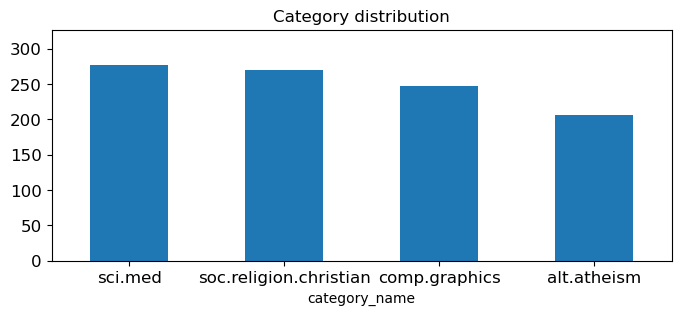

In [10]:
# set environment & required data
import matplotlib.pyplot as plt
%matplotlib inline

# Answer here
# plot barchart for X_sample
print(max(X_sample.category_name.value_counts())) #capture the max value, and set it as ylim
upper_bound = max(X_sample.category_name.value_counts() + 50) #277 + 50
print(X_sample.category_name.value_counts())

X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

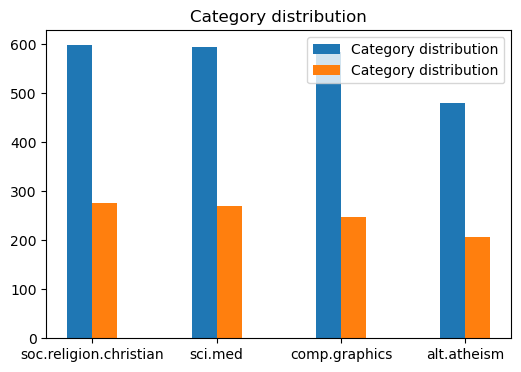

In [11]:
import matplotlib.pyplot as plt

# Answer here
bar_width=0.2
# set the position of x-axis
x_indices = range(len(X.category_name.value_counts().index))

# create a new diagram and set 
plt.figure(figsize=(6, 4))
# draw bar diagram
plt.bar(x_indices, X.category_name.value_counts(), width=bar_width, label='Category distribution')
plt.bar([i + bar_width for i in x_indices], X_sample.category_name.value_counts(), width=bar_width, label='Category distribution')
# set x-axis label
plt.xticks([i + bar_width / 2 for i in x_indices], X.category_name.value_counts().index)
plt.title('Category distribution')
plt.legend()
plt.show()


One thing that stood out from the both datasets, is that the distribution of the categories remain relatively the same, which is a good sign for us data scientist. There are many ways to conduct sampling on the dataset and still obtain a representative enough dataset. That is not the main focus in this notebook, but if you would like to know more about sampling and how the `sample` feature works, just reference the Pandas documentation and you will find interesting ways to conduct more advanced sampling.

### **>>> Exercise 9 (5 min):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [12]:
# set environment & required data
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
analyze = count_vect.build_analyzer()

# Answer here
# How do we turn our array[0] text document into a tokenized text using the build_analyzer()?
print(X.text[0])
analyze(X.text[0])

From: sd345@city.ac.uk (Michael Collier) Subject: Converting images to HP LaserJet III? Nntp-Posting-Host: hampton Organization: The City University Lines: 14  Does anyone know of a good way (standard PC application/PD utility) to convert tif/img/tga files into LaserJet III format.  We would also like to do the same, converting to HPGL (HP plotter) files.  Please email any response.  Is this the correct group?  Thanks in advance.  Michael. --  Michael Collier (Programmer)                 The Computer Unit, Email: M.P.Collier@uk.ac.city                The City University, Tel: 071 477-8000 x3769                      London, Fax: 071 477-8565                            EC1V 0HB. 


['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [13]:
# Answer here
# we want to find the meaning of the 2ns "1" in the following array
print(f"X_counts[4:5, 0:100].toarray()=\n{X_counts[4:5, 0:100].toarray()}")

# step1: find its index
indices = np.where( X_counts[4:5, 0:100].toarray() ==1 )
# step2: use count_vect.get_feature_names_out() to decode
print(f"\nAnswer is below: ")
count_vect.get_feature_names_out()[indices[1][1]]

X_counts[4:5, 0:100].toarray()=
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]

Answer is below: 


'01'

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

,term_0278,term_02908,term_0293,term_03,term_030105,term_0303,term_030334,term_03051,term_0306,term_030734,term_031423,term_0318,term_032251,term_0330,term_033446,term_033843,term_034226,term_0349,term_0358,term_0362
doc_100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_101,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_104,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_106,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_107,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


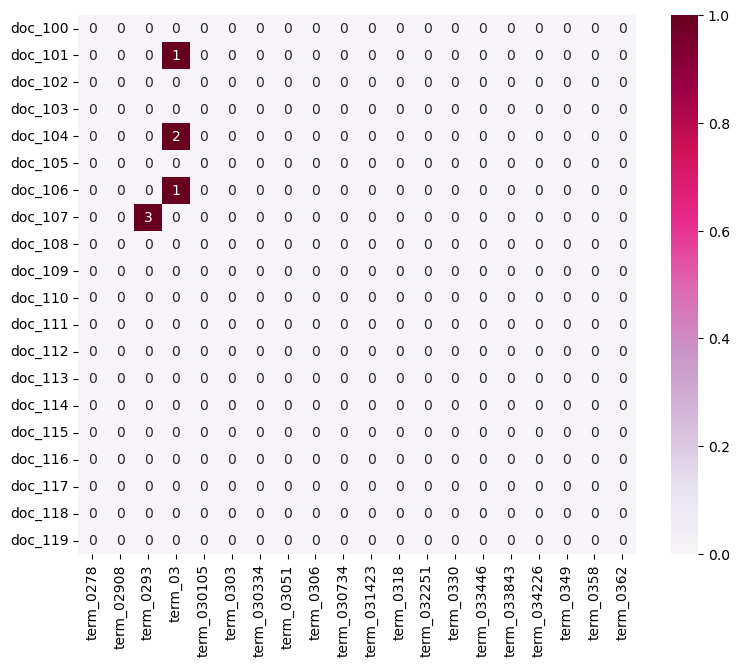

In [14]:
# set environment & required data
import seaborn as sns

# Answer here
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[100:120]] #use 100th~119th fearture
plot_y = ["doc_"+ str(i) for i in list(X.index)[100:120]] #use 100th~119th index
plot_z = X_counts[100:120,100:120].toarray() #X_counts[how many documents, how many terms] -> word frequency of 100th~119th feature in 100th~119th text

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,                     # dataframe
                 cmap="PuRd",                   # color
                 vmin=0, vmax=1, annot=True)    # vmin/vmax -> value for lightest and deepest color

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

(2257, 3)


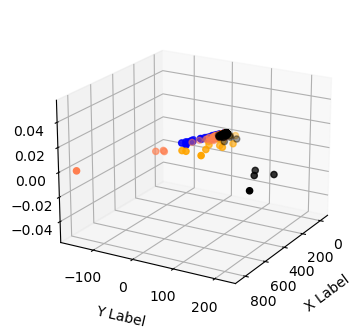

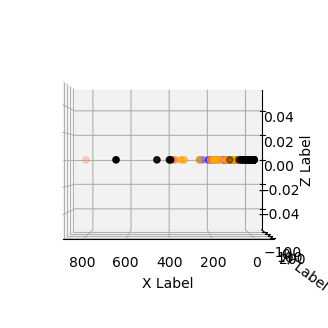

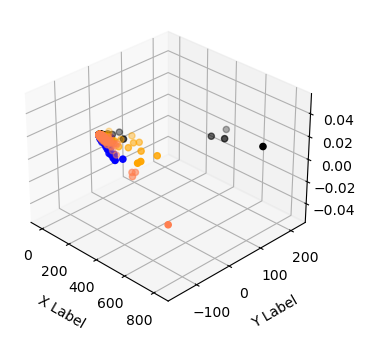

In [15]:
from sklearn.decomposition import PCA

# Answer here
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray()) 
print(X_reduced.shape)
X_reduced

# each color for a category
col = ['coral', 'blue', 'black', 'orange']

# plot different 3 angle
# for azim in [-60, 0, 60]:
for elev, azim in [[20,30],[0,90],[30,-45]]:
    fig = plt.figure(figsize = (10,4))
    ax = fig.add_subplot(111,projection='3d')

    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]
    
        ax.scatter(xs, ys, c = c, marker='o')

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_zlabel('\nZ Label')

    # set different angle
    ax.view_init(elev=elev, azim=azim)  
    plt.show()

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [16]:
# set environment & required data
## have to install an extension -> "Jupyter Notebook Rdnderers", if using VS Code
import plotly.express as px
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

# Answer here
#create dataframe
df = {'feature': count_vect.get_feature_names_out()[:300], 'frequency': term_frequencies[:300]} 
px.histogram(df, x="feature", y="frequency")


### >>> **Exercise 14 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


'\nFind:\nThose words repeating over and over again are usually determiner, pronoun, preposition and so on.\n'

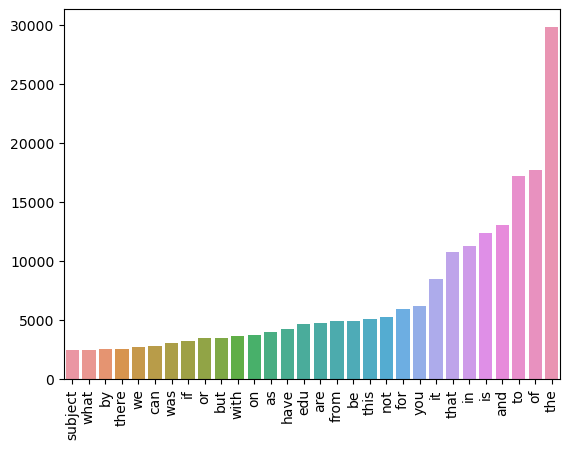

In [17]:
# Answer here
# find top 30 index
top_30_indices = np.argsort(term_frequencies)[-30:]

plt.subplots()
g = sns.barplot(x=count_vect.get_feature_names_out()[top_30_indices], 
            y=term_frequencies[top_30_indices])
g.set_xticklabels(count_vect.get_feature_names_out()[top_30_indices], rotation = 90);

"""
Find:
Those words repeating over and over again are usually determiner, pronoun, preposition and so on.
"""


---

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

' value=0 in y-axis means that feature only occurs once'

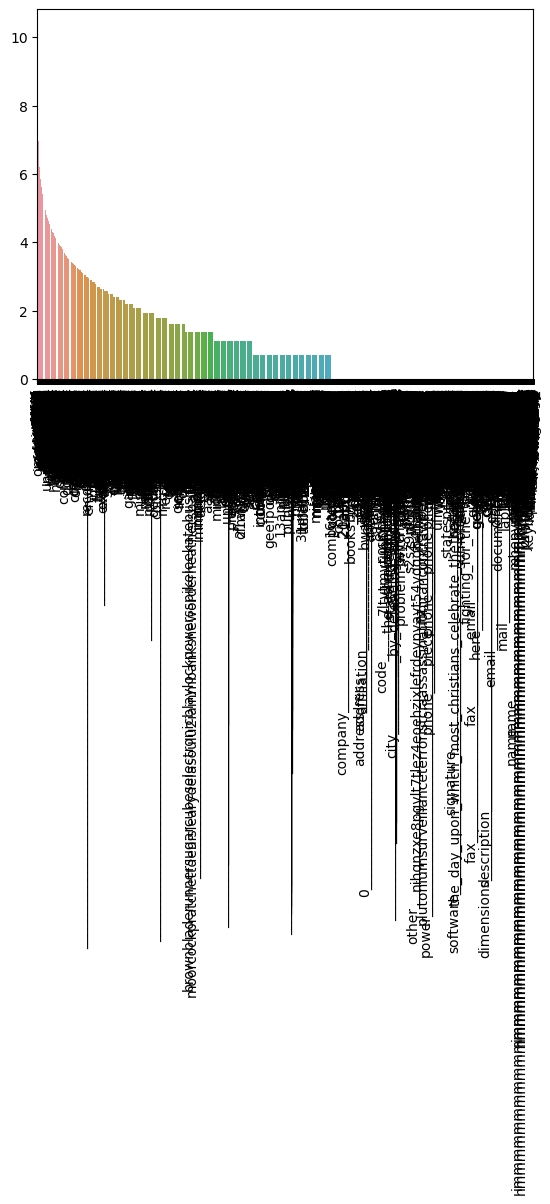

In [18]:
# Answer here
# plt.subplots(figsize=(100, 10))

sorted_indices = np.argsort(term_frequencies)[:]
sorted_indices=sorted_indices[::-1]
plt.subplots()
g = sns.barplot(    x=count_vect.get_feature_names_out()[sorted_indices], 
                    y=np.log(term_frequencies[sorted_indices])
            )
g.set_xticklabels(count_vect.get_feature_names_out()[sorted_indices], rotation = 90);

" value=0 in y-axis means that feature only occurs once"

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [19]:
"""Answer is in next cell."""

# set environment & required data
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
# stpe1: use 'category' to encode
mlb = preprocessing.LabelBinarizer() # label -> one-got encoding (to erase the meaning of distance in label)
mlb.fit(X.category)
X['bin_category'] = mlb.transform(X['category']).tolist()
X[0:9]

,text,category,category_name,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"


In [20]:
# Answer here
# step2: use 'category_name' to encode
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()

""" 
It's work and have the smae encoding result. 
Because the each 'category' correspoded with specific 'category_name'.
"""
X[0:9] #check

,text,category,category_name,bin_category,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]","[0, 0, 1, 0]"


-----

# 2. Second: New datasets

In [21]:
# datasets downloaded from: https://archive.ics.uci.edu/dataset/331/sentiment+labelled+sentences
import pandas as pd
datasets_dir = './sentiment labelled sentences/'

# 1. load 3 dataset as df
df_amazon = pd.read_csv(datasets_dir+"amazon_cells_labelled.txt", sep='\t',names=['sentences', 'score'])
    # Note: the format of 'imdb_labelled.txt' is slight different
df_imdb = pd.read_csv(datasets_dir+"imdb_labelled.txt", sep='  \t',names=['sentences', 'score'])
df_yelp = pd.read_csv(datasets_dir+"yelp_labelled.txt", sep='\t',names=['sentences', 'score'])

# 2. concat 3 df
df_dataset=pd.concat([df_amazon, df_imdb, df_yelp])
df_dataset.reset_index(drop=True, inplace=True)

# 3. save 
df_dataset.to_csv(datasets_dir+'dataset.csv', index=False)

# check
print("before combine -> ",end='')
print(df_amazon.shape, df_imdb.shape, df_yelp.shape)
print("after combine -> ",end='')
print(df_dataset.shape)
df_dataset

before combine -> (1000, 2) (1000, 2) (1000, 2)
after combine -> (3000, 2)


/var/folders/3t/7k59nrzs1pbbmxp7948zqxnw0000gn/T/ipykernel_17740/2850099707.py:8: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



,sentences,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2995,I think food should have flavor and texture an...,0
2996,Appetite instantly gone.,0
2997,Overall I was not impressed and would not go b...,0
2998,"The whole experience was underwhelming, and I ...",0


# 3. Third: Tasks on new dataset

In [22]:
import pandas as pd

# load dataset's csv file
dataset_path = './sentiment labelled sentences/dataset.csv'
df_dataset = pd.read_csv(dataset_path)
df_dataset

,sentences,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2995,I think food should have flavor and texture an...,0
2996,Appetite instantly gone.,0
2997,Overall I was not impressed and would not go b...,0
2998,"The whole experience was underwhelming, and I ...",0


## 3-1. Meaningful visualization

In [23]:
import helpers.data_mining_helpers as dmh
# preprocessing: duplicated data
print(f"orginal df_dataset -> {df_dataset.shape}")
print(f"#duplicated data -> {sum(df_dataset.duplicated()) }")

df_dataset.drop_duplicates(keep="last", inplace=True)
df_dataset.reset_index(drop=True, inplace=True)
print(f"processed df_dataset -> {df_dataset.shape}")

# preprocessing: missing value
print("missing value as below:")
df_dataset.isnull().apply(lambda x: dmh.check_missing_values(x))



orginal df_dataset -> (3000, 2)
#duplicated data -> 18
processed df_dataset -> (2982, 2)
missing value as below:


,sentences,score
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


score
0    1492
1    1490
Name: count, dtype: int64


'The number of categories is similar, which is a good thing.'

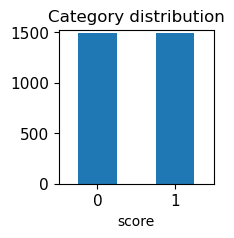

In [24]:
print(df_dataset.score.value_counts())
df_dataset.score.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0,max(df_dataset.score.value_counts())+30],        
                                    rot = 0, fontsize = 11, figsize = (2,2)) # rot: angle of x-axis names
"""The number of categories is similar, which is a good thing."""

[nltk_data] Downloading package punkt to /Users/alvin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


(2982, 5155)
(2982, 2)


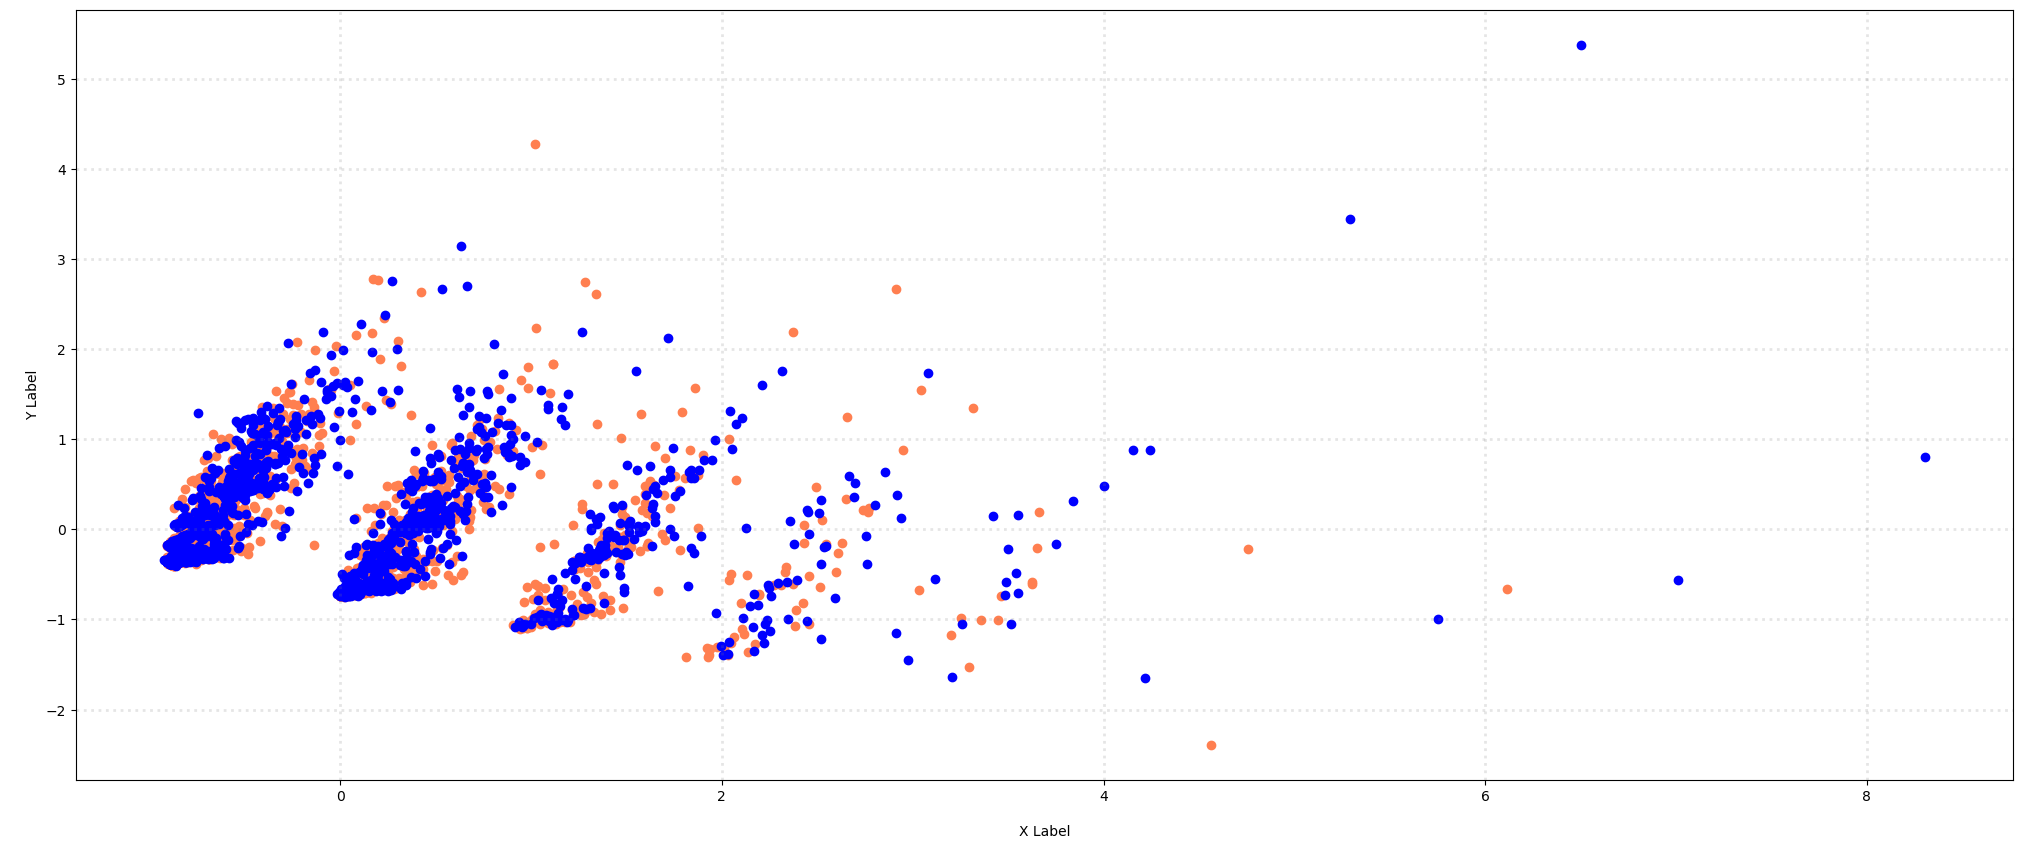

In [25]:
import numpy as np
import nltk
nltk.download('punkt')
import helpers.data_mining_helpers as dmh
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
# # tokenize
df_dataset['unigrams'] = df_dataset['sentences'].apply(lambda x: dmh.tokenize_text(x))
count_vect = CountVectorizer()
df_dataset_counts = count_vect.fit_transform(df_dataset.sentences) #learn the vocabulary and return document-term matrix

# 2-D PCA diagram
from sklearn.decomposition import PCA
df_dataset_reduced = PCA(n_components = 2).fit_transform(df_dataset_counts.toarray()) 
print(df_dataset_counts.shape) # -> (#sentence , #volcab)
print(df_dataset_reduced.shape)

col = ['coral', 'blue']
score=[0,1]
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, score):
    xs = df_dataset_reduced[df_dataset['score'] == category].T[0]
    ys = df_dataset_reduced[df_dataset['score'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

(2982, 5155)
(2982, 3)


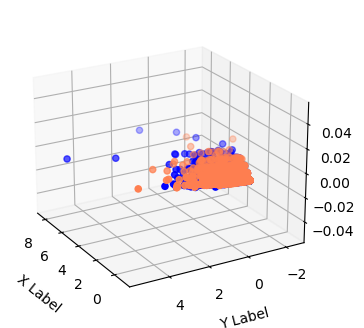

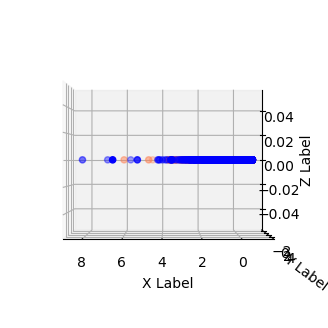

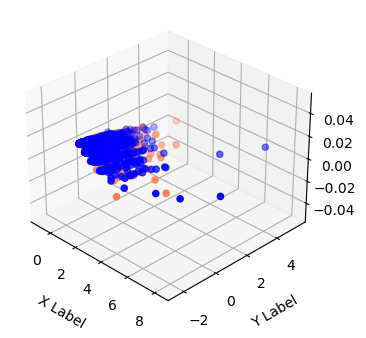

In [26]:
# 3-D PCA diagram
from sklearn.decomposition import PCA
df_dataset_reduced = PCA(n_components = 3).fit_transform(df_dataset_counts.toarray()) 
print(df_dataset_counts.shape) # -> (#sentence , #volcab)
print(df_dataset_reduced.shape)

col = ['coral', 'blue']
score=[0,1]

for elev, azim in [[22,150],[0,90],[30,-45]]:
    fig = plt.figure(figsize = (10,4))
    ax = fig.add_subplot(111,projection='3d')

    for c, category in zip(col, score):
        xs = df_dataset_reduced[df_dataset['score'] == category].T[0]
        ys = df_dataset_reduced[df_dataset['score'] == category].T[1]
        zs = df_dataset_reduced[df_dataset['score'] == category].T[2]
    
        ax.scatter(xs, ys, c = c, marker='o')

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_zlabel('\nZ Label')

    # set different angle
    ax.view_init(elev=elev, azim=azim)  
    plt.show()

In [27]:
# first 300 features' frequency in order
import plotly.express as px

# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,df_dataset_counts.shape[1]):
    term_frequencies.append(int(sum(df_dataset_counts[:,j].toarray()))) # use "toarray()" method to speed up calculation

df = {'feature': count_vect.get_feature_names_out()[:300], 'frequency': term_frequencies[:300]} 
px.histogram(df, x="feature", y="frequency")

/var/folders/3t/7k59nrzs1pbbmxp7948zqxnw0000gn/T/ipykernel_17740/51574761.py:7: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



'\nFind:\nThose words repeating over and over again are usually determiner, pronoun, preposition and so on.\n'

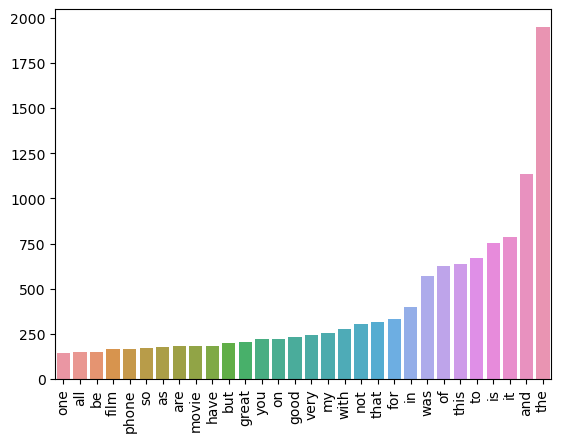

In [28]:
# Top 30 word
top_30_indices = np.argsort(term_frequencies)[-30:]
top_30_indices = [int(x) for x in top_30_indices]
plt.subplots()
g = sns.barplot(    x=count_vect.get_feature_names_out()[top_30_indices], 
                    y=np.array(term_frequencies)[top_30_indices])
g.set_xticklabels(count_vect.get_feature_names_out()[top_30_indices], rotation = 90);

"""
Find:
Those words repeating over and over again are usually determiner, pronoun, preposition and so on.
"""

## 3-2~3-3. (1) Naive Bayes Classifier using TF-IDF features

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

tfidf_vectorizer = TfidfVectorizer() #convert text data to vectors
X=df_dataset.sentences  
y=df_dataset.score      #label
tfidf_matrix = tfidf_vectorizer.fit_transform(X)    # encoder
feature_names = tfidf_vectorizer.get_feature_names_out()
feature_names
# print("shape: ", tfidf_matrix.shape)
# print(tfidf_matrix[0])

#split data
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=42)

# Naive Bayese Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

# evaluation
accuracy_1 = accuracy_score(y_test, y_pred)
precision_1 = precision_score(y_test, y_pred)
recall_1 = recall_score(y_test, y_pred)
f1_1 = f1_score(y_test, y_pred)
conf_matrix_1 = confusion_matrix(y_test, y_pred)
print("TF-IDF:")
print("Accuracy \t->", accuracy_1)
print("Precision \t->", precision_1)
print("Recall \t\t->", recall_1)
print("F1 \t\t->", f1_1)
print("Conf_matrix \t->\n", conf_matrix_1)

TF-IDF:
Accuracy 	-> 0.8257956448911222
Precision 	-> 0.8247422680412371
Recall 		-> 0.8191126279863481
F1 		-> 0.821917808219178
Conf_matrix 	->
 [[253  51]
 [ 53 240]]


## 3-3. (2) Naive Bayes Classifier using Feature Frequency

In [30]:
# print("shape: ", df_dataset_counts.shape)
# print(df_dataset_counts[0])

#split data
X_train, X_test, y_train, y_test = train_test_split(df_dataset_counts, y, test_size=0.2, random_state=42)

# Naive Bayese Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

# evaluation
accuracy_2 = accuracy_score(y_test, y_pred)
precision_2 = precision_score(y_test, y_pred)
recall_2 = recall_score(y_test, y_pred)
f1_2 = f1_score(y_test, y_pred)
conf_matrix_2 = confusion_matrix(y_test, y_pred)
print("Feature Freq.:")
print("Accuracy \t->", accuracy_2)
print("Precision \t->", precision_2)
print("Recall \t\t->", recall_2)
print("F1 \t\t->", f1_2)
print("Conf_matrix \t->\n",conf_matrix_2)


Feature Freq.:
Accuracy 	-> 0.8291457286432161
Precision 	-> 0.8327526132404182
Recall 		-> 0.8156996587030717
F1 		-> 0.8241379310344829
Conf_matrix 	->
 [[256  48]
 [ 54 239]]


In [31]:
result = {
    'Accuracy': [accuracy_1, accuracy_2],
    'Precision': [precision_1, precision_2],
    'Recall': [recall_1, recall_2],
    'F1': [f1_1, f1_2]
}
df_result = pd.DataFrame(result, index= ['TF-IDF', 'F Freq.'])
df_result

,Accuracy,Precision,Recall,F1
TF-IDF,0.825796,0.824742,0.819113,0.821918
F Freq.,0.829146,0.832753,0.815700,0.824138


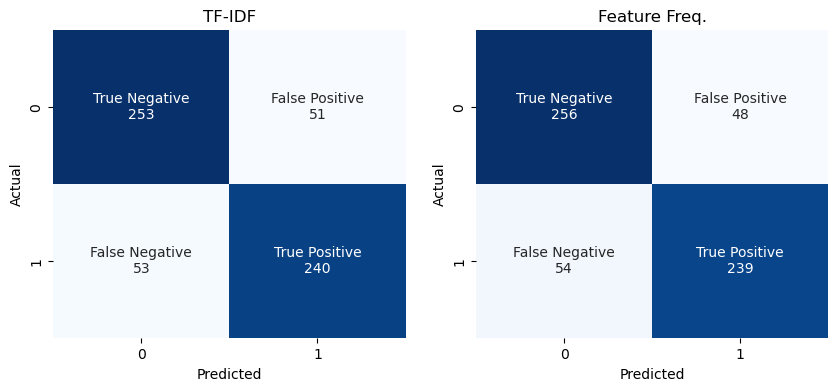

In [32]:
# draw heat map for conf_matrix
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
labels_1 = [f'{label}\n{count}' for label, count in zip(labels, conf_matrix_1.flatten())]
labels_2 = [f'{label}\n{count}' for label, count in zip(labels, conf_matrix_2.flatten())]

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.heatmap(conf_matrix_1, annot=np.array(labels_1).reshape(2, 2), fmt='', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('TF-IDF')
sns.heatmap(conf_matrix_2, annot=np.array(labels_2).reshape(2, 2), fmt='', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_title('Feature Freq.')

# plt.tight_layout()
plt.show()

### <font color='red'>Result Dissusion:</font>
<b> TF-IDF is higher        -> Precision, Recall</b>   
<b> Feature Freq. is higher -> Accuracy, F1</b>
--
Because Feature Freq. only focus on Ground Truth label, its (TP+TN) will be higher, which is good for accuracy.   
TF-IDF pay some attention to not dominant part, so it can increase recall.

# 4. Fourth: The inefficient/meaningless parts you noticed. How to improve?

### 1. Plot bar diagram using unordered feature frequency -> not very meaningful
Reason:   
The frequency of each feature may have big different, and make the diagram difficult to observe.   
The number of feature is too many to to be recognizable.

### 2. Find a useful parameter of "duplicated()": keep="last"

In [33]:
data = {'Name': ['Alice', 'Bob', 'Charlie','Bob'],
        'Age': [25, 30, 35,30]}
df=pd.DataFrame(data)
# preprocessing: duplicated data
# keep="last" -> remove all duplicated rows except the last one (can see the index)
# keep="first" -> remove all duplicated rows except the first one (can see the index)
# keep=False -> remove all duplicated rows
df.drop_duplicates(keep="last", inplace=True) 
df

,Name,Age
0,Alice,25
2,Charlie,35
3,Bob,30


### 3. Find a useful method: DataFrame.reset_index(drop=True, inplace=True)

In [34]:
# after rearrange the dataframe or remove some duplicated rows
# the order of index will be broken
# we can use reset_index(drop=True, inplace=True) to fix it
df.reset_index(drop=True, inplace=True)
"""0 2 3 -> 0 1 2"""
df 

,Name,Age
0,Alice,25
1,Charlie,35
2,Bob,30


### 4. Heat map isn't suitable for sparse matrix
Reason:    
From Exercise 11, we can observe that the heat map cannot contain much information for sparse martrix.    
It' better used in the criteria that most feature are occur in most of sample.

### 5. The y-axis of long tail diagram is better to do some normalization or log().
In Excerise 15, I use np.log to achieve better visualization.


### 6. Some useful parameter for "sklearn.metrics.pairwise.cosine_similarity"

In [35]:
# When we are doing text mining or some data science task, 
# the dimension of the data tend to be enormous.
# It more memory-saving to use dense matrix instead of sparse matrix.

from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

X1 = np.array([[1, 2, 3],
              [4, 5, 6]])
X2 = np.array([[2, 2, 2],
              [1, 1, 1]])

# dense_output=True -> dense matrix -> easier for human
similarity_matrix_dense = cosine_similarity(X1, X2, dense_output=True)

# dense_output=False -> sparse matrix
similarity_matrix_dense = cosine_similarity(X1, X2, dense_output=False)


